In [ ]:

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.image as mp


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#openingfiles
with open('/content/drive/My Drive/Multi/Data/train.fr') as f:
    train_fr = f.read().split('\n')
with open('/content/drive/My Drive/Multi/Data/train.en') as f:
    train_en = f.read().split('\n')
with open('/content/drive/My Drive/Multi/Data/train_images.txt') as f:
    train_img_name = f.read().split('\n')

In [ ]:
#french sentence
train_fr[1:5]

['Plusieurs hommes en casque font fonctionner un système de poulies géant.',
 'Une petite fille grimpe dans une maisonnette en bois.',
 'Un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre.',
 'Deux hommes aux fourneaux préparent à manger.']

In [ ]:
#englsih sentence
train_en[1:5]

['Several men in hard hats are operating a giant pulley system.',
 'A little girl climbing into a wooden playhouse.',
 'A man in a blue shirt is standing on a ladder cleaning a window.',
 'Two men are at the stove preparing food.']

In [ ]:
train_en[-2]

'A man in shorts and a Hawaiian shirt leans over the rail of a pilot boat, with fog and mountains in the background.'

In [ ]:
#removing last elements
train_fr.pop()
train_fr.pop()
train_en.pop()
train_en.pop()
train_img_name.pop()

''

In [ ]:
#length of transalations and images
print(len(train_fr))
print(len(train_en))
print(len(train_img_name))

28998
28999
29000


In [ ]:
#creating an array of images and names
img_path=[]
for s in train_img_name:
    img_path.append("/content/drive/My Drive/Multi/flickr30k-images/"+s)

In [ ]:
img_path[1:5]

['/content/drive/My Drive/Multi/flickr30k-images/10002456.jpg',
 '/content/drive/My Drive/Multi/flickr30k-images/1000268201.jpg',
 '/content/drive/My Drive/Multi/flickr30k-images/1000344755.jpg',
 '/content/drive/My Drive/Multi/flickr30k-images/1000366164.jpg']

/content/drive/My Drive/Multi/flickr30k-images/10002456.jpg
de:Plusieurs hommes en casque font fonctionner un système de poulies géant.
en:Several men in hard hats are operating a giant pulley system.


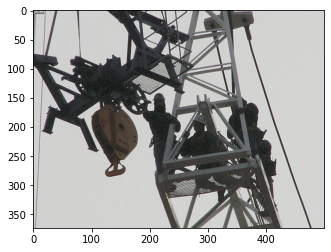

In [ ]:
#ploting 2 image its original caption and transalated reference caption
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("fr:"+train_fr[1])
print("en:"+train_en[1])

In [ ]:
#limiting array size into 5000
choicenum=5000
train_fr=train_fr[:choicenum]
train_en=train_en[:choicenum]

In [ ]:
#dataframes with source and reference translations
fr_df = pd.DataFrame(train_fr, columns=['fr']) 
en_df = pd.DataFrame(train_en, columns=['en']) 

In [ ]:
fr_df

,fr
0,Deux jeunes hommes blancs sont dehors près de ...
1,Plusieurs hommes en casque font fonctionner un...
2,Une petite fille grimpe dans une maisonnette e...
3,Un homme dans une chemise bleue se tient sur u...
4,Deux hommes aux fourneaux préparent à manger.
...,...
4995,Une femme rousse est assise devant une clôture...
4996,Un jeune couple profite d'une bataille de boul...
4997,Un enfant pose avec une drôle de devant l'obje...
4998,Un homme en chemise grise et pantalon kaki est...


In [ ]:
#cleaning text for removing unnecessary characters
import re
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    #text=' '.join(text.split())
    return text



In [ ]:
text1 = en_df["en"].apply(clean_text)
text2 = fr_df["fr"].apply(clean_text)
text1

0       two young white males are outside near many bu...
1       several men in hard hats are operating a giant...
2          a little girl climbing into a wooden playhouse
3       a man in a blue shirt is standing on a ladder ...
4                 two men are at the stove preparing food
                              ...                        
4995    a redheaded woman is sitting in front of a cha...
4996               a young couple enjoys a snowball fight
4997    a child is posing with a funny by for the came...
4998    a man in a gray shirt and khaki pants sits on ...
4999    a young woman walking along in the shadows in ...
Name: en, Length: 5000, dtype: object

In [ ]:
#created an array of reference source and translations
text1 = list(text1.values)
text2 = list(text2.values)
text2

['deux jeunes hommes blancs sont dehors près de buissons',
 'plusieurs hommes en casque font fonctionner un système de poulies géant',
 'une petite fille grimpe dans une maisonnette en bois',
 'un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre',
 'deux hommes aux fourneaux préparent à manger',
 'un homme en vert tient une guitare tandis quun autre homme observe sa chemise',
 'un homme sourit à un ours en peluche',
 'une fille branchée parle à son portable tout en glissant lentement dans la rue',
 'une femme avec un gros sac passe par une porte',
 'des garçons dansent sur des barres au milieu de la nuit',
 'une classe de ballet composée de cinq filles sautent en cadence',
 'quatre gars dont trois portent des chapeaux sautent du haut dun escalier',
 'un chien noir et un chien à tâches se battent',
 'un homme en uniforme orange et vert fluo conduit un tracteur vert',
 'plusieurs femmes attendent dehors dans une ville',
 'une femme portant un haut noir et d

In [ ]:
text1[1:5]

['several men in hard hats are operating a giant pulley system',
 'a little girl climbing into a wooden playhouse',
 'a man in a blue shirt is standing on a ladder cleaning a window',
 'two men are at the stove preparing food']

In [ ]:
#use start and end tags on sentence
texttemp=[]
for s in text2:
    temp="cls "+s+" eos"
    texttemp.append(temp)
texttemp[1:5]

['cls plusieurs hommes en casque font fonctionner un système de poulies géant eos',
 'cls une petite fille grimpe dans une maisonnette en bois eos',
 'cls un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre eos',
 'cls deux hommes aux fourneaux préparent à manger eos']

In [ ]:
#copy that into list
text2=[]
text2=texttemp
text2[1:5]

['cls plusieurs hommes en casque font fonctionner un système de poulies géant eos',
 'cls une petite fille grimpe dans une maisonnette en bois eos',
 'cls un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre eos',
 'cls deux hommes aux fourneaux préparent à manger eos']

In [ ]:
#splitting into sentences
#first split sentence into words and the count words in sentence append it to english_words and french_words

from sklearn.model_selection import train_test_split
english_words = []
french_words = []

for i in text1:
    english_words.append(len(i.split()))

for j in text2:
    french_words.append(len(j.split()))

In [ ]:
 english_words

[9,
 11,
 8,
 14,
 8,
 14,
 8,
 13,
 11,
 10,
 9,
 15,
 9,
 15,
 7,
 16,
 12,
 14,
 9,
 15,
 11,
 16,
 8,
 10,
 16,
 20,
 9,
 11,
 8,
 15,
 10,
 10,
 7,
 15,
 9,
 19,
 9,
 18,
 5,
 19,
 7,
 12,
 7,
 11,
 8,
 14,
 10,
 16,
 13,
 15,
 15,
 19,
 7,
 19,
 7,
 16,
 10,
 20,
 7,
 10,
 11,
 14,
 10,
 12,
 13,
 16,
 7,
 16,
 11,
 14,
 11,
 8,
 8,
 16,
 15,
 17,
 11,
 13,
 7,
 11,
 9,
 11,
 9,
 14,
 7,
 12,
 7,
 19,
 10,
 12,
 14,
 10,
 16,
 14,
 9,
 17,
 9,
 18,
 11,
 18,
 11,
 12,
 9,
 13,
 12,
 16,
 9,
 12,
 10,
 11,
 13,
 15,
 11,
 10,
 7,
 12,
 9,
 15,
 9,
 10,
 12,
 18,
 13,
 9,
 12,
 13,
 7,
 16,
 7,
 18,
 15,
 13,
 14,
 18,
 11,
 20,
 9,
 13,
 13,
 22,
 12,
 16,
 7,
 15,
 7,
 12,
 8,
 10,
 9,
 10,
 8,
 12,
 10,
 9,
 7,
 12,
 8,
 13,
 11,
 19,
 8,
 15,
 12,
 7,
 10,
 11,
 9,
 11,
 15,
 21,
 14,
 10,
 8,
 17,
 10,
 13,
 12,
 11,
 10,
 9,
 12,
 16,
 9,
 13,
 7,
 10,
 8,
 12,
 9,
 12,
 8,
 10,
 8,
 19,
 12,
 19,
 18,
 8,
 6,
 15,
 11,
 13,
 9,
 12,
 9,
 10,
 10,
 13,
 10,
 9,
 8,
 10,
 9,
 

In [ ]:
french_words

[11,
 13,
 11,
 17,
 9,
 16,
 10,
 16,
 12,
 13,
 13,
 14,
 12,
 14,
 9,
 22,
 14,
 16,
 11,
 17,
 13,
 16,
 10,
 15,
 17,
 23,
 11,
 15,
 10,
 16,
 13,
 12,
 9,
 17,
 11,
 21,
 14,
 21,
 7,
 16,
 8,
 14,
 11,
 13,
 16,
 16,
 12,
 19,
 20,
 24,
 17,
 23,
 10,
 21,
 10,
 14,
 13,
 27,
 8,
 11,
 13,
 16,
 15,
 14,
 17,
 15,
 8,
 17,
 15,
 19,
 12,
 12,
 14,
 19,
 15,
 19,
 13,
 14,
 8,
 12,
 13,
 17,
 11,
 21,
 11,
 13,
 12,
 19,
 12,
 14,
 17,
 15,
 22,
 18,
 11,
 21,
 13,
 20,
 18,
 23,
 15,
 17,
 11,
 14,
 15,
 19,
 12,
 14,
 18,
 13,
 18,
 15,
 13,
 12,
 9,
 16,
 13,
 17,
 12,
 10,
 19,
 19,
 15,
 11,
 16,
 15,
 9,
 16,
 10,
 21,
 17,
 15,
 14,
 19,
 13,
 21,
 14,
 14,
 14,
 26,
 15,
 15,
 7,
 22,
 9,
 15,
 10,
 14,
 10,
 12,
 11,
 15,
 13,
 10,
 11,
 16,
 11,
 17,
 17,
 21,
 11,
 20,
 15,
 8,
 15,
 16,
 17,
 15,
 18,
 26,
 15,
 13,
 8,
 18,
 15,
 16,
 18,
 13,
 12,
 11,
 18,
 20,
 14,
 18,
 9,
 13,
 12,
 15,
 11,
 14,
 10,
 12,
 12,
 29,
 15,
 20,
 18,
 12,
 8,
 18,
 16,
 16,
 13,
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


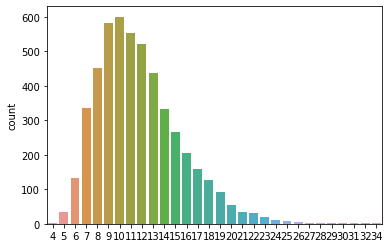

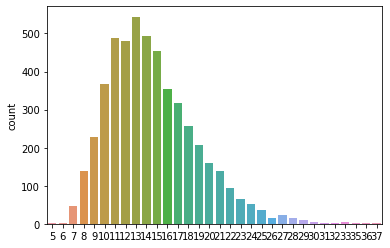

In [ ]:
#plotting count of english and french sentences
import seaborn as sn
import matplotlib.pyplot as plt

sn.countplot(english_words)
plt.show()

sn.countplot(x = french_words)
plt.show()

In [ ]:
#printing maximum length of english words and french word
max_len_english = max(english_words)
max_len_french = max(french_words)
max_len_english

34

In [ ]:
max(french_words)

35

In [ ]:
#splitting manually
x_tr=text1[:choicenum-500]
y_tr=text2[:choicenum-500]
x_val=text1[choicenum-500:]
y_val=text2[choicenum-500:]

In [ ]:
len(text1)

5000

In [ ]:
len(text2)

5000

In [ ]:
print(choicenum)

5000


In [ ]:
a=text1[choicenum-500:]
a

['a man on a bicycle rides past a bright blue door',
 'a tribesman makes his way up a tree with his feet and his hands',
 'a group of mothers are sitting and breast feeding their babies',
 'two cows stand in front of people riding a bus',
 'a man is sitting on a bench at a subway station',
 'a man with a green jacket and a black hat standing near a doorway',
 'the gray and white dog is walking on gravel',
 'a man on a skateboard is jumping in the air with it',
 'two male soccer players are resting to take a drink',
 'a toddler walking through an old building in a blue outfit',
 'a dog runs through the snow',
 'a child in a blue jacket and helmet is on a skateboard',
 'two men working on building a house',
 'the child is standing on top of a snowbank with their arms outstretched',
 'two young girls in fancy dresses are standing outside',
 'a toy lego set is featured in the foreground while a woman and child play with it in the background',
 'kids forming a rock band',
 'a group of six p

In [ ]:
#tokenizing the train and validation text 
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)

In [ ]:
x_tr[1:10]

[[110, 30, 2, 253, 289, 12, 665, 1, 591, 2171, 1537],
 [1, 39, 27, 172, 56, 1, 191, 2172],
 [1, 5, 2, 1, 32, 22, 6, 24, 4, 1, 592, 593, 1, 173],
 [10, 30, 12, 15, 3, 746, 254, 111],
 [1, 5, 2, 45, 126, 1, 88, 28, 3, 79, 5, 1179, 25, 22],
 [1, 5, 6, 96, 15, 1, 666, 2173],
 [1, 2174, 27, 99, 4, 46, 320, 28, 2175, 1538, 34, 3, 40],
 [1, 11, 9, 1, 48, 594, 6, 38, 44, 1, 832],
 [95, 370, 4, 833, 2, 3, 192, 8, 3, 353]]

In [ ]:
#padding zeros to equalizing the lenth

from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = max_len_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = max_len_english,padding = 'post')





In [ ]:
x_tr [1:5]

array([[ 110,   30,    2,  253,  289,   12,  665,    1,  591, 2171, 1537,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,   39,   27,  172,   56,    1,  191, 2172,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,    5,    2,    1,   32,   22,    6,   24,    4,    1,  592,
         593,    1,  173,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  10,   30,   12,   15,    3,  746,  254,  111,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [ ]:
# +1 for padding ,we are using 1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
x_voc_size

4134

In [ ]:
fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.
Why don't combine them? Because you almost always fit once and convert to sequences many times. You will fit on your training corpus once and use that exact same word_index dictionary at train / eval / testing / prediction time to convert actual text into sequences to feed them to the network. So it makes sense to keep those methods separate.

In [ ]:
#same tokenizing and padding with y tokens
# y data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)

y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = max_len_french,padding = 'post')
y_val = pad_sequences(y_val,maxlen = max_len_french,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1

In [ ]:
y_voc_size

4763

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 4.8 MB/s 


In [ ]:
#importing required frameworks
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [ ]:
#VGG16 network is used for feature extraction,last softmax layer is removed from it
modelvgg = VGG16(include_top=True,weights="imagenet")
## load the locally saved weights 
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#an array is predefined for feature extraction 
imagedata=np.zeros(shape=(choicenum,224,224,3))
for i in range(choicenum):
  #reading image,reshaping it and storing it on imagedata
    temp=mp.imread(img_path[i])
    temp=cv2.resize(temp,(224,224))
    imagedata[i]=temp
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)
#
    #writefile.write(imagedata)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[1:5]
jpgs[1:5]
for i,name in enumerate(jpgs): 
   
   print(name)

/content/drive/My Drive/Multi/flickr30k-images/10002456.jpg
/content/drive/My Drive/Multi/flickr30k-images/1000268201.jpg
/content/drive/My Drive/Multi/flickr30k-images/1000344755.jpg
/content/drive/My Drive/Multi/flickr30k-images/1000366164.jpg


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:choicenum]
#OrderedDict preserves the order in which the keys are inserted
images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
  #i=serial number of image path
  #name=/content/drive/My Drive/Multi/flickr30k-images/10002456.jpg name of image
  # image serial and name is used
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    #preprocess_input function is meant to adequate your image to the format the model requires
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    #y_pred is collapsed into 1 dimension
    #feature extraction using VGG model with batch size 100
    images[name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Multi/flickr30k-images/1000092795.jpg
200 /content/drive/My Drive/Multi/flickr30k-images/1079742005.jpg
400 /content/drive/My Drive/Multi/flickr30k-images/1145770960.jpg
600 /content/drive/My Drive/Multi/flickr30k-images/122634567.jpg
800 /content/drive/My Drive/Multi/flickr30k-images/12904242.jpg
1000 /content/drive/My Drive/Multi/flickr30k-images/1345459258.jpg
1200 /content/drive/My Drive/Multi/flickr30k-images/1396703063.jpg
1400 /content/drive/My Drive/Multi/flickr30k-images/1439282131.jpg
1600 /content/drive/My Drive/Multi/flickr30k-images/149149251.jpg
1800 /content/drive/My Drive/Multi/flickr30k-images/1568723169.jpg
2000 /content/drive/My Drive/Multi/flickr30k-images/1676898063.jpg
2200 /content/drive/My Drive/Multi/flickr30k-images/1788886557.jpg
2400 /content/drive/My Drive/Multi/flickr30k-images/1873155511.jpg
2600 /content/drive/My Drive/Multi/flickr30k-images/196381488.jpg
2800 /content/drive/My Drive/Multi/flickr30k-images/2052953131.jpg
3000 /c

In [ ]:
print(type(images))

<class 'collections.OrderedDict'>


In [ ]:
#ordered dictionary with '/content/drive/My Drive/Multi/flickr30k-images/1000092795.jpg' as key and feature vectors as key
images['/content/drive/My Drive/Multi/flickr30k-images/1000092795.jpg']

array([3.896554  , 3.8459592 , 0.        , ..., 0.        , 0.63518006,
       1.1603202 ], dtype=float32)

In [ ]:
#array of zeros
vgg_imfea=np.zeros(shape=(len(jpgs),4096))
vgg_imfea

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#loading image features into vgg_imfea
for i in range(len(jpgs)):
    vgg_imfea[i]=images[jpgs[i]]

In [ ]:

vgg_imfea

array([[3.89655399, 3.84595919, 0.        , ..., 0.        , 0.63518006,
        1.16032016],
       [0.64460975, 0.        , 4.74562931, ..., 0.        , 0.        ,
        0.        ],
       [2.50764656, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.08195543, 0.36560759, 0.        , ..., 0.61388516, 0.        ,
        0.        ],
       [2.9178853 , 0.56789374, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20416957, 0.        , 0.        , ..., 0.        , 0.        ,
        1.35677993]])

In [ ]:
#splitting the test data and training data manualaly 
train_vggf=vgg_imfea[:choicenum-500]
val_vggf=vgg_imfea[choicenum-500:]

In [ ]:
#g_1=GlobalAveragePooling2D()(conv_3)
#input is used to intilaize a tensor with shape pf 4096 , indicates that the expected input will be batches of 4096-dimensional vectors.
img_inputs=Input(shape=(4096,))
#Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). 
#Model will take as input arrays of shape (None, 4096)
# and output arrays of shape (None, 512).
#ReLU activation: max(x, 0)
#repeatvector https://machinelearningmastery.com/encoder-decoder-long-short-term-memory-networks/
#repeatector https://datascience.stackexchange.com/questions/46491/what-is-the-job-of-repeatvector-and-timedistributed
d_1=Dense(512, activation='relu')(img_inputs)
#r_1 repeact vector  repeats the inputs a number of times. Here a dense layer vector is created then repeated it to match with lstm layer output
r_1=RepeatVector(max_len_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097664   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 34, 512)           0         
Total params: 2,097,664
Trainable params: 2,097,664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_voc=x_voc_size
x_voc

4134

In [ ]:
y_voc=y_voc_size
y_voc

4761

In [ ]:
#A RNN layer (or stack thereof) acts as "encoder": it processes the input sequence and returns its own internal state. Note that we discard the outputs of the encoder RNN, only recovering the state. This state will serve as the "context", or "conditioning", of the decoder in the next step.
#Another RNN layer (or stack thereof) acts as "decoder": it is trained to predict the next characters of the target sequence, given previous characters of the target sequence. Specifically, it is trained to turn the target sequences into the same sequences but offset by one timestep in the future, a training process called "teacher forcing" in this context. Importantly, the encoder uses as initial state the state vectors from the encoder, which is how the decoder obtains information about what it is supposed to generate. Effectively, the decoder learns to generate targets[t+1...] given targets[...t], conditioned on the input sequence.

In [ ]:


# img_inputs=Input(shape=(224,224,3))
# conv_1=Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='valid')(img_inputs)
# m_pool=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_1)
# bn_1=BatchNormalization()(m_pool)
# conv_2=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='valid')(bn_1)
# conv_2=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_2)
# m_pool1=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_2)
# conv_3=Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='valid')(m_pool1)
# conv_3=Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_3)
# m_pool2=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(conv_3)
# bn_2=BatchNormalization()(m_pool2)
# conv_3=Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='valid')(bn_2)
# conv_3=Conv2D(filters=512, kernel_size=(3,3), strides=(1, 1), padding='valid')(conv_3)
# g_1=GlobalAveragePooling2D()(conv_3)
# d_1=Dense(512, activation='relu')(g_1)
# r_1=RepeatVector(max_len_english)(d_1)
# vf_model = Model(img_inputs, r_1)
#vf_model.summary()

#an image is encoded into lower dimensional latent dim,Then  then decodes the latent representation back to an image.
#image dimensional vector that represents image
#iamge is compressed into latent dimension
latent_dim = 512
embedding_dim=512

# Encoder
#input tensor of length max_len
encoder_inputs = Input(shape=(max_len_english,))

#embedding layer
#The model will take as input an integer matrix of size (batch,
# input_length)and the largest integer (i.e. word index) in the input
#largest integer (i.e. word index) in the input=x_voc
#input_dim-Integer. Size of the vocabulary, i.e. maximum integer index + 1. -x_voc
#embedding_dim=512
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
#encoder lstm 2
#The return_state contructor argument, configuring a RNN layer to return a list where the first entry is the outputs and the next entries are the internal RNN states. This is used to recover the states of the encoder.
#The inital_state call argument, specifying the initial state(s) of a RNN. This is used to pass the encoder states to the decoder as initial states.
#The return_sequences constructor argument, configuring a RNN to return its full sequence of outputs (instead of just the last output, which the defaults behavior). This is used in the decoder.
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#returning encoder outputs hidden state and cell state
#Each LSTM cell will output one hidden state h for each input.
#LSTM cell retains an internal state that is not output, called the cell state, or c.
#Generally, we do not need to access the cell state unless we are developing sophisticated models where subsequent layers may need to have their cell state initialized with the final cell state of another layer, such as in an encoder-decoder model.
#https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/
#Keras provides the return_state argument to the LSTM layer that will provide access to the hidden state output (state_h) and the cell state (state_c). 
#encoder outputs and state_h refer to the same hidden state output.
#encoder outputs is the last hidden state output
#The hidden state and the cell state could in turn be used to initialize the states of another LSTM layer with the same number of cells.
#return sequences and return states are used to return sequence and return state
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
#r1 is image part
#encoder input includes embeddings that represent text
encoder_output2=Concatenate(axis=-1)([encoder_output2,r_1])

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
#model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#decoder output means decoder target data
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 512)      2116608     input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 34, 512), (N 2099200     embedding_2[0][0]                
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history=model.fit([x_tr,y_tr[:,:-1],train_vggf], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],val_vggf], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512)

Epoch 1/100
9/9 [==============================] - 14s 668ms/step - loss: 5.5037 - val_loss: 2.1791
Epoch 2/100
9/9 [==============================] - 5s 573ms/step - loss: 2.4217 - val_loss: 2.1129
Epoch 3/100
9/9 [==============================] - 5s 572ms/step - loss: 2.3463 - val_loss: 2.0470
Epoch 4/100
9/9 [==============================] - 5s 570ms/step - loss: 2.2701 - val_loss: 2.0062
Epoch 5/100
9/9 [==============================] - 5s 574ms/step - loss: 2.2155 - val_loss: 1.9677
Epoch 6/100
9/9 [==============================] - 5s 568ms/step - loss: 2.1642 - val_loss: 1.9195
Epoch 7/100
9/9 [==============================] - 5s 573ms/step - loss: 2.1142 - val_loss: 1.8776
Epoch 8/100
9/9 [==============================] - 5s 580ms/step - loss: 2.0727 - val_loss: 1.8486
Epoch 9/100
9/9 [==============================] - 5s 570ms/step - loss: 2.0438 - val_loss: 1.8299
Epoch 10/100
9/9 [==============================] - 5s 577ms/step - loss: 2.0193 - val_loss: 1.8107
Epoch 11

In [ ]:
reverse_target_word_index=y_tokens.index_word
y_tokens.index_word

{1: 'un',
 2: 'une',
 3: 'de',
 4: 'en',
 5: 'dans',
 6: 'sur',
 7: 'homme',
 8: 'et',
 9: 'des',
 10: 'avec',
 11: 'à',
 12: 'la',
 13: 'femme',
 14: 'le',
 15: 'deux',
 16: 'dun',
 17: 'est',
 18: 'se',
 19: 'dune',
 20: 'chien',
 21: 'train',
 22: 'garçon',
 23: 'les',
 24: 'jeune',
 25: 'fille',
 26: 'debout',
 27: 'assis',
 28: 'hommes',
 29: 'personnes',
 30: 'au',
 31: 'portant',
 32: 'sont',
 33: 'rouge',
 34: 'devant',
 35: 'groupe',
 36: 'noir',
 37: 'du',
 38: 'blanc',
 39: 'tient',
 40: 'tandis',
 41: 'son',
 42: 'gens',
 43: 'pour',
 44: 'rue',
 45: 'enfant',
 46: 'shirt',
 47: 'chemise',
 48: 'trois',
 49: 'petit',
 50: 't',
 51: 'qui',
 52: 'fait',
 53: 'joue',
 54: 'côté',
 55: 'sa',
 56: 'bleu',
 57: 'regarde',
 58: 'près',
 59: 'femmes',
 60: 'personne',
 61: 'enfants',
 62: 'leau',
 63: 'petite',
 64: 'par',
 65: 'plage',
 66: 'tenant',
 67: 'vêtu',
 68: 'que',
 69: 'brun',
 70: 'jaune',
 71: 'jouent',
 72: 'neige',
 73: 'jeunes',
 74: 'porte',
 75: 'autre',
 76: 've

In [ ]:
reverse_source_word_index=x_tokens.index_word
x_tokens.index_word

{1: 'a',
 2: 'in',
 3: 'the',
 4: 'on',
 5: 'man',
 6: 'is',
 7: 'and',
 8: 'of',
 9: 'with',
 10: 'two',
 11: 'woman',
 12: 'are',
 13: 'to',
 14: 'people',
 15: 'at',
 16: 'an',
 17: 'wearing',
 18: 'white',
 19: 'young',
 20: 'dog',
 21: 'boy',
 22: 'shirt',
 23: 'black',
 24: 'standing',
 25: 'his',
 26: 'sitting',
 27: 'girl',
 28: 'while',
 29: 'red',
 30: 'men',
 31: 'playing',
 32: 'blue',
 33: 'group',
 34: 'down',
 35: 'front',
 36: 'holding',
 37: 'water',
 38: 'walking',
 39: 'little',
 40: 'street',
 41: 'three',
 42: 'brown',
 43: 'child',
 44: 'by',
 45: 'green',
 46: 'her',
 47: 'up',
 48: 'large',
 49: 'outside',
 50: 'one',
 51: 'for',
 52: 'women',
 53: 'through',
 54: 'person',
 55: 'from',
 56: 'into',
 57: 'children',
 58: 'looking',
 59: 'yellow',
 60: 'hat',
 61: 'beach',
 62: 'small',
 63: 'next',
 64: 'ball',
 65: 'out',
 66: 'near',
 67: 'as',
 68: 'another',
 69: 'stands',
 70: 'snow',
 71: 'their',
 72: 'running',
 73: 'dressed',
 74: 'grass',
 75: 'buildin

In [ ]:
target_word_index=y_tokens.word_index
y_tokens.word_index

{'un': 1,
 'une': 2,
 'de': 3,
 'en': 4,
 'dans': 5,
 'sur': 6,
 'homme': 7,
 'et': 8,
 'des': 9,
 'avec': 10,
 'à': 11,
 'la': 12,
 'femme': 13,
 'le': 14,
 'deux': 15,
 'dun': 16,
 'est': 17,
 'se': 18,
 'dune': 19,
 'chien': 20,
 'train': 21,
 'garçon': 22,
 'les': 23,
 'jeune': 24,
 'fille': 25,
 'debout': 26,
 'assis': 27,
 'hommes': 28,
 'personnes': 29,
 'au': 30,
 'portant': 31,
 'sont': 32,
 'rouge': 33,
 'devant': 34,
 'groupe': 35,
 'noir': 36,
 'du': 37,
 'blanc': 38,
 'tient': 39,
 'tandis': 40,
 'son': 41,
 'gens': 42,
 'pour': 43,
 'rue': 44,
 'enfant': 45,
 'shirt': 46,
 'chemise': 47,
 'trois': 48,
 'petit': 49,
 't': 50,
 'qui': 51,
 'fait': 52,
 'joue': 53,
 'côté': 54,
 'sa': 55,
 'bleu': 56,
 'regarde': 57,
 'près': 58,
 'femmes': 59,
 'personne': 60,
 'enfants': 61,
 'leau': 62,
 'petite': 63,
 'par': 64,
 'plage': 65,
 'tenant': 66,
 'vêtu': 67,
 'que': 68,
 'brun': 69,
 'jaune': 70,
 'jouent': 71,
 'neige': 72,
 'jeunes': 73,
 'porte': 74,
 'autre': 75,
 'veste'

In [ ]:
#After training we will move on with interference inference setup:
#To decode a test sentence, we will repeatedly:
# Encode the input sentence and retrieve the initial decoder state
#Run one step of the decoder with this initial state and a "start of sequence" token as target. The output will be the next target character.
#Append the target character predicted and repeat.

# Encode the input sequence to get the feature vector.This will give initial decoder state
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 512)      2116608     input_6[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 34, 512), (N 2099200     embedding_2[0][0]                
____________________________________________________________________________________________

In [ ]:
#this contains intial decoder state-embeddings
#refer https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_english,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
decoder_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 512)    2437632     input_7[0][0]                    
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 512)]        0                                            
____________________________________________________________________________________________

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict([input_seq,img])
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['cls']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (max_len_french -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['cls']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),train_vggf[i]))
    print("\n")

Review: two young white males are outside near many bushes 


KeyError: ignored

Review: a man in a blue shirt is standing on a ladder cleaning a window 
Original summary: un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre 
Predicted summary:  un homme dans une chemise blanche se tient sur une échelle pour nettoyer une fenêtre


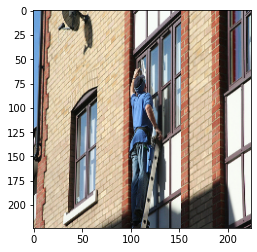

In [ ]:
i=3
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

Review: a little girl climbing into a wooden playhouse 
Original summary: une petite fille grimpe dans une maisonnette en bois 
Predicted summary:  une petite fille dans une robe verte fait un câlin dans une bouche


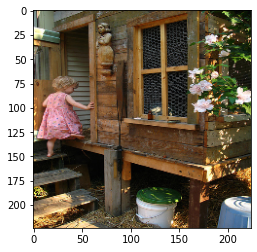

In [ ]:
i=2
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

Review: two young white males are outside near many bushes 
Original summary: deux jeunes hommes blancs sont dehors près de buissons 
Predicted summary:  deux jeunes hommes sont debout dehors dehors dehors


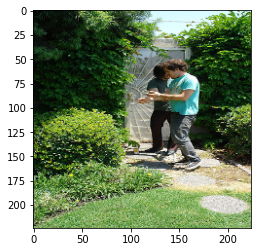

In [ ]:
i=0
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

In [ ]:
!pip install sacrebleu
import sacrebleu
import random

     |████████████████████████████████| 90 kB 5.9 MB/s 


In [ ]:
temp_o=[]
temp_p=[]
for i in range(50):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),train_vggf[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

43.06357919269344


In [ ]:
temp_o=[]
temp_p=[]
for i in range(100):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),train_vggf[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

51.38214940516171


In [ ]:
temp_o=[]
temp_p=[]
for i in range(100):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,max_len_english),vgg_imfea[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

47.961251225111454
